In [1]:
import pandas as pd

In [2]:
bike = pd.read_csv("C:\\Users\\DELL\\Documents\\csv and json\\Sales.csv")
bike.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Checking Null Value

In [3]:
bike.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

# Finding Duplicate values

In [5]:
bike.duplicated().value_counts()

False    112036
True       1000
Name: count, dtype: int64

 # Rows & Column

In [36]:
bike.shape

(113036, 18)

In [37]:
bike.size

2034648

# Drop Duplicate Values

In [3]:
bike.drop_duplicates(inplace=True)

# Again Checking Duplicate values

In [5]:
bike.duplicated().value_counts()

False    112036
Name: count, dtype: int64

In [42]:
bike.duplicated().sum()

np.int64(0)

In [43]:
bike.shape

(112036, 18)

In [44]:
bike.size

2016648

# Rename Columns

In [4]:
bike.rename(columns = {"Customer_Age":"Age","Customer_Gender":"Gender","Unit_Cost":"Cost_Price","Unit_Price":"Selling_Price","Cost":"Total_Buying_Cost","Revenue":"Total_Sell"},inplace=True)

In [5]:
bike.head(1)

,Date,Day,Month,Year,Age,Age_Group,Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Cost_Price,Selling_Price,Profit,Total_Buying_Cost,Total_Sell
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


# changing Columns position

In [6]:
col ="Total_Buying_Cost"
value = bike.pop(col)

bike.insert(14,col,value)

In [7]:
col='Profit'
value = bike.pop(col)

bike.insert(17, col, value)

In [7]:
bike.head(1)

,Date,Day,Month,Year,Age,Age_Group,Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Cost_Price,Total_Buying_Cost,Selling_Price,Total_Sell,Profit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,360,120,950,590


# Count how many male vs female customers purchased products.

In [35]:
counts = bike['Gender'].value_counts().reset_index()
counts.columns=['Gender','Counts']

counts

,Gender,Counts
0,M,58312
1,F,54724


# minimum, maximum, and average Age of customers

In [39]:
minimum_Age = bike['Age'].min()
print(minimum_Age)

17


In [40]:
maximum_Age = bike['Age'].max()
maximum_Age

87

In [46]:
Average_Age = bike['Age'].mean()
print(Average_Age)

35.91921157861212


# Which countries or states have the highest number of orders

In [63]:
countries_orders = bike.groupby('Country')['Order_Quantity'].max().reset_index()
countries_orders.columns = ['Country','Orders']
countries_orders

,Country,Orders
0,Australia,32
1,Canada,32
2,France,32
3,Germany,32
4,United Kingdom,32
5,United States,32


In [66]:
States_orders = bike.groupby('State')['Order_Quantity'].max().reset_index()
States_orders.columns = ['State','Orders']
States_orders.sort_values(by = 'Orders', ascending=False)

,State,Orders
4,Brandenburg,32
3,Bayern,32
8,England,32
6,California,32
5,British Columbia,32
14,Hauts de Seine,32
15,Hessen,32
13,Hamburg,32
9,Essonne,32
44,Texas,32


# How many orders were made in each month

In [85]:
months = bike.groupby('Month')['Order_Quantity'].sum().sort_values(ascending = False).reset_index()
months

,Month,Order_Quantity
0,December,132105
1,June,127499
2,May,124616
3,April,117348
4,March,110181
5,January,109344
6,October,107645
7,November,107480
8,February,104116
9,September,102292


# Top 5 States has the highest Profit

In [76]:
State = bike.groupby('State')['Profit'].max().reset_index()
State.columns=['State','Profit']
State.sort_values(by = 'Profit', ascending = False).head(5)

,State,Profit
35,Queensland,15096
6,California,5638
1,Alberta,5628
5,British Columbia,5485
3,Bayern,5485


# Top 10 most profitable products

In [11]:
profitable_products = bike.groupby('Product')['Profit'].sum().reset_index()
profitable_products.columns= ['Product','Profit']
profitable_products.sort_values(by = 'Profit', ascending = False).head(10)

,Product,Profit
32,"Mountain-200 Black, 38",1302237
61,"Road-150 Red, 62",1237388
36,"Mountain-200 Silver, 42",1226878
101,"Sport-100 Helmet, Red",1191175
35,"Mountain-200 Silver, 38",1155311
99,"Sport-100 Helmet, Black",1140795
34,"Mountain-200 Black, 46",1075401
100,"Sport-100 Helmet, Blue",1047701
59,"Road-150 Red, 52",1044569
33,"Mountain-200 Black, 42",1032061


# *Yearly Trend of Sales broken down by Product Category*

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

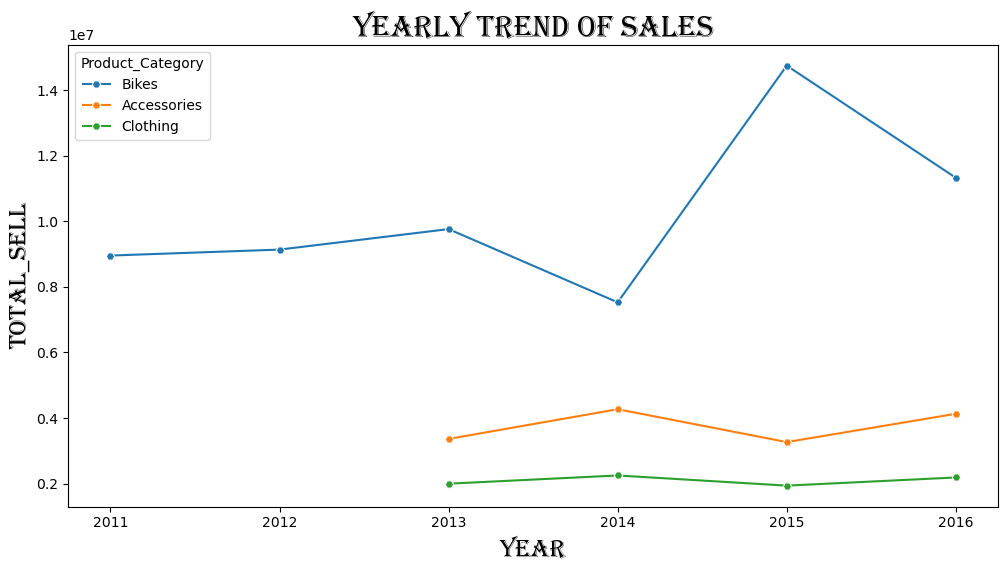

In [35]:
# Group data by Year and Product_Category
datas = bike.groupby(['Year','Product_Category'])['Total_Sell'].sum().reset_index()

# Create line plot
plt.figure(figsize=(12,6))
sns.lineplot(data = datas, x = 'Year', y='Total_Sell', hue= 'Product_Category', marker = 'H')


plt.title('Yearly Trend of Sales',
          fontdict = {'fontname':'Algerian','color':'k', 'fontsize':22})
plt.xlabel('Year',
          fontdict = {'fontname':'Algerian','color':'k', 'fontsize':18})
plt.ylabel('Total_Sell',
          fontdict = {'fontname':'Algerian','color':'k', 'fontsize':18})
plt.show()

# *Top 10 most sold products*

In [78]:
Top_10= bike.groupby('Product')['Order_Quantity'].sum().reset_index()
Top_10 = Top_10.sort_values(by = 'Order_Quantity', ascending=False).head(10)
Top_10 

,Product,Order_Quantity
126,Water Bottle - 30 oz.,162051
52,Patch Kit/8 Patches,155310
23,Mountain Tire Tube,100915
0,AWC Logo Cap,67316
101,"Sport-100 Helmet, Red",63652
6,Fender Set - Mountain,62118
99,"Sport-100 Helmet, Black",62072
56,Road Tire Tube,61305
100,"Sport-100 Helmet, Blue",55855
103,Touring Tire Tube,55794


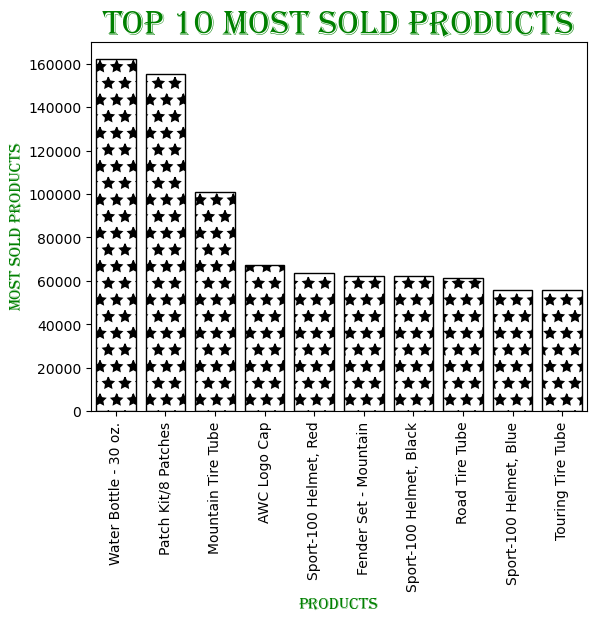

In [86]:
# bar plot
sns.barplot(x='Product', y='Order_Quantity', data =Top_10, color = 'white', hatch = '*', edgecolor = 'k')

plt.title('Top 10 Most Sold Products',
         fontdict = {'fontname':'Algerian','color':'g', 'fontsize':25})
plt.xlabel('Products',
          fontdict = {'fontname':'Algerian','color':'g', 'fontsize':12})
plt.ylabel('Most Sold Products',
          fontdict = {'fontname':'Algerian','color':'g', 'fontsize':12})
plt.xticks(rotation=90)
plt.show()

# *Orders by Month Heatmap*

In [10]:
sales =bike.groupby('Month')['Order_Quantity'].sum().reset_index()
sales = sales.sort_values(by = 'Order_Quantity', ascending=False)
sales

,Month,Order_Quantity
2,December,132105
6,June,127499
8,May,124616
0,April,117348
7,March,110181
4,January,109344
10,October,107645
9,November,107480
3,February,104116
11,September,102292


Text(0.5, 1.0, 'Orders by Month Heatmap')

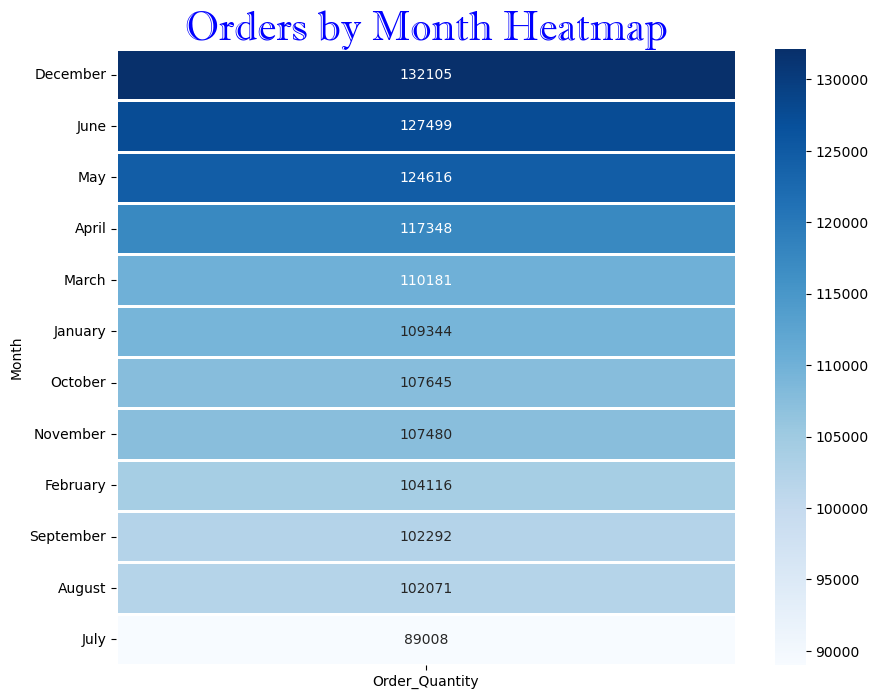

In [36]:
plt.figure(figsize = (10,8))
sns.heatmap(sales.set_index('Month')[['Order_Quantity']],cmap = 'Blues', annot = True,fmt = '.0f', linewidth = '1')

plt.title('Orders by Month Heatmap',
         fontdict = {'fontname':'Imprint MT Shadow','color':'b','fontsize':30})

# *heatmap correlation between numerical columns*

<Axes: >

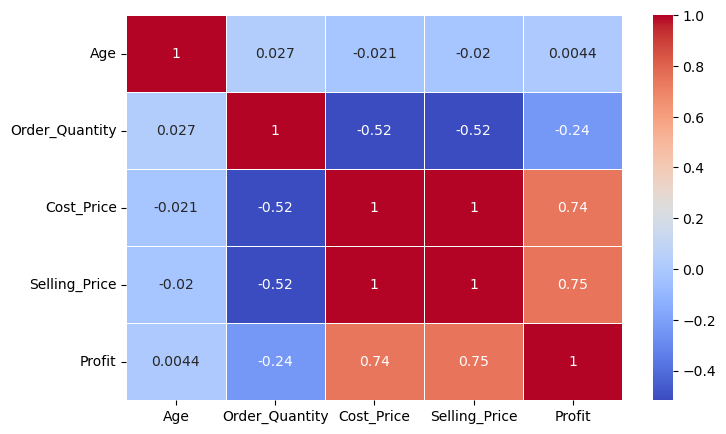

In [18]:
cols = ['Age', 'Order_Quantity', 'Cost_Price', 'Selling_Price', 'Profit']

# Calculate correlation
corr = bike[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

# *subplot dashboard with 4 charts*

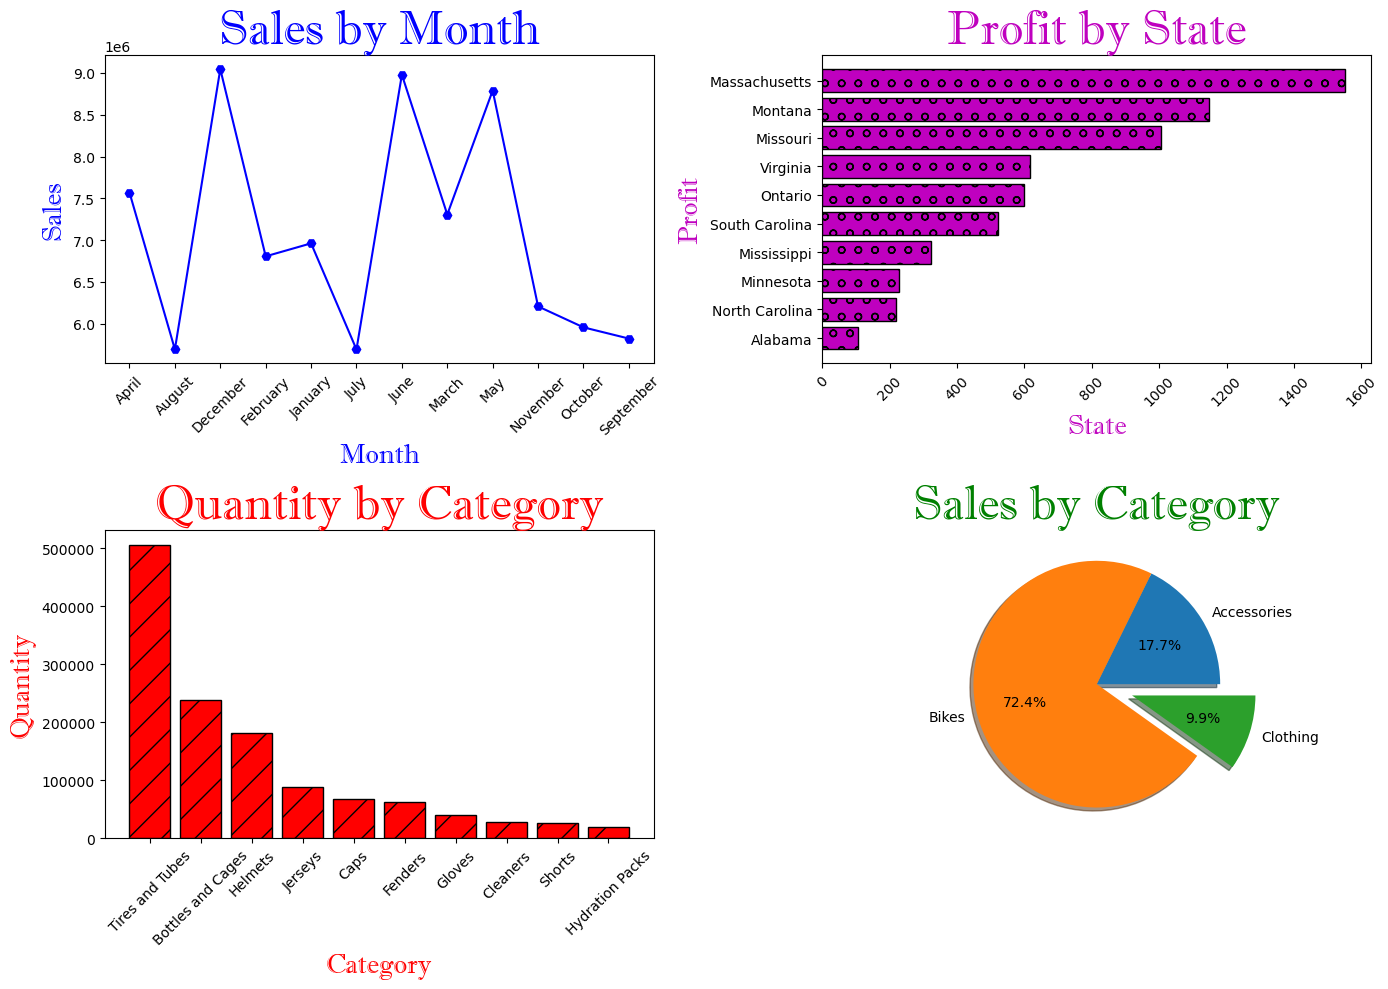

In [107]:
plt.figure(figsize=(14, 10))

# 1. Sales by Month
# -------------------------
plt.subplot(2, 2, 1)
sales_month = bike.groupby('Month')['Total_Sell'].sum().sort_index()
plt.plot(sales_month, color = 'b', marker = 'H')
plt.title("Sales by Month",fontdict = {'fontname':'Imprint MT Shadow','color':'b','fontsize':35})
plt.xlabel("Month",fontdict = {'fontname':'Imprint MT Shadow','color':'b','fontsize':20})
plt.ylabel("Sales",fontdict = {'fontname':'Imprint MT Shadow','color':'b','fontsize':20})
plt.xticks(rotation=45)


# 2. Lowest Profit by State
# -----------------------------
plt.subplot(2, 2, 2)
profit_state = bike.groupby('State')['Profit'].sum().sort_values(ascending=True).head(10)
plt.barh(profit_state.index, profit_state.values, color = 'm', edgecolor = 'k', hatch = 'o')
plt.title("Profit by State",fontdict = {'fontname':'Imprint MT Shadow','color':'m','fontsize':35})
plt.xticks(rotation=45)
plt.xlabel("State",fontdict = {'fontname':'Imprint MT Shadow','color':'m','fontsize':20})
plt.ylabel("Profit",fontdict = {'fontname':'Imprint MT Shadow','color':'m','fontsize':20})

# 3. Quantity by Category
# -------------------------
plt.subplot(2, 2, 3)
qty = bike.groupby('Sub_Category')['Order_Quantity'].sum().sort_values(ascending =False).head(10)
plt.bar(qty.index, qty.values, color = 'r', edgecolor = 'k', hatch = '/')
plt.title("Quantity by Category",fontdict = {'fontname':'Imprint MT Shadow','color':'r','fontsize':35})
plt.xlabel("Category",fontdict = {'fontname':'Imprint MT Shadow','color':'r','fontsize':20})
plt.ylabel("Quantity",fontdict = {'fontname':'Imprint MT Shadow','color':'r','fontsize':20})
plt.xticks(rotation=45)


# 4. Sales by Category 
# -------------------------
plt.subplot(2, 2, 4)
sales = bike.groupby('Product_Category')['Total_Sell'].sum()
explode = [0,0,0.3]
plt.pie(sales.values, labels = sales.index, shadow = True, explode = explode, autopct='%.1f%%')
plt.title("Sales by Category",fontdict = {'fontname':'Imprint MT Shadow','color':'g','fontsize':35})

plt.tight_layout()
plt.show()

# *Regression plot*

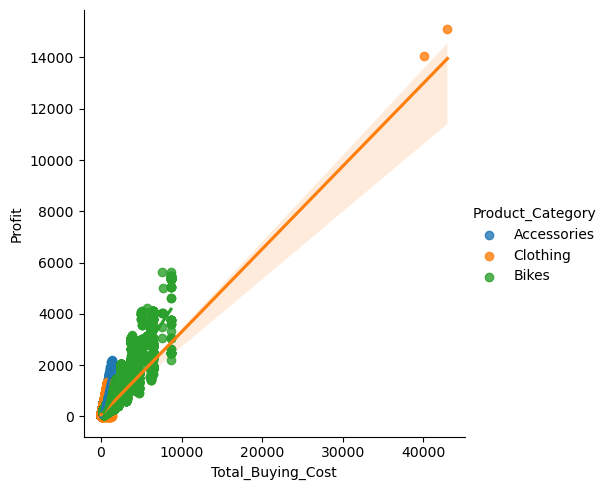

In [105]:
sns.lmplot(x = 'Total_Buying_Cost', y = 'Profit', hue = 'Product_Category', data = bike)

In [109]:
bike.to_csv("C:\\Users\\DELL\\Documents\\csv and json\\Csv\\bike_sales.csv",index = False)